# Assignment 5

## Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('a5_deu-eng/deu.txt',"rb") as f:
    lines0 = f.read()
    lines0 = lines0.decode('utf-8')
    lines0 = lines0.split('\n') ############# list #######
print(type(lines0))
lines0

<class 'list'>


['Hi.\tHallo!\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)',
 'Hi.\tGrüß Gott!\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)',
 'Run!\tLauf!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)',
 'Wow!\tPotzdonner!\tCC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122382 (Pfirsichbaeumchen)',
 'Wow!\tDonnerwetter!\tCC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122391 (Pfirsichbaeumchen)',
 'Fire!\tFeuer!\tCC-BY 2.0 (France) Attribution: tatoeba.org #1829639 (Spamster) & #1958697 (Tamy)',
 'Help!\tHilfe!\tCC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #575889 (MUIRIEL)',
 'Help!\tZu Hülf!\tCC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #2122375 (Pfirsichbaeumchen)',
 'Stop!\tStopp!\tCC-BY 2.0 (France) Attribution: tatoeba.org #448320 (FeuDRenais) & #626467 (jakov)',
 'Wait!\tWarte!\tCC-BY 2.0 (France) Attribution: t

In [3]:
#lines_PD = pd.DataFrame(lines0)


lines_PD = pd.DataFrame([sub.split("\t") for sub in lines0])
lines_PD.head()
#lines_csv = lines_PD.tocsv(lines_PD)
#lines_PD.to_csv('G://_SIT_homework/CS584A/Assignment5/deu-eng/deu.csv', sep='\t', encoding='utf-8')
#datasetSentences_df = pd.read_csv("G://_SIT_homework/CS584A/Assignment5/deu-eng/deu.csv",error_bad_lines=False)

,0,1,2
0,Hi.,Hallo!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Hi.,Grüß Gott!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
2,Run!,Lauf!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Wow!,Potzdonner!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Wow!,Donnerwetter!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...


In [4]:
Eng_Ger_trans_df = lines_PD[[0,1]]
Eng_Ger_trans_df.rename(columns={0:'English_sentences',1:'German_sentences',}, inplace=True)
Eng_Ger_trans_df

/Users/albertliang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,English_sentences,German_sentences
0,Hi.,Hallo!
1,Hi.,Grüß Gott!
2,Run!,Lauf!
3,Wow!,Potzdonner!
4,Wow!,Donnerwetter!
...,...,...
200515,If someone who doesn't know your background sa...,"Wenn jemand, der deine Herkunft nicht kennt, s..."
200516,If someone who doesn't know your background sa...,"Wenn jemand Fremdes dir sagt, dass du dich wie..."
200517,It may be impossible to get a completely error...,"Es ist wohl unmöglich, einen vollkommen fehler..."
200518,Doubtless there exists in this world precisely...,Ohne Zweifel findet sich auf dieser Welt zu je...


In [5]:
Eng_Ger_trans_ar = Eng_Ger_trans_df.values ### Convert to array

In [6]:
Eng_Ger_trans_ar

array([['Hi.', 'Hallo!'],
       ['Hi.', 'Grüß Gott!'],
       ['Run!', 'Lauf!'],
       ...,
       ['It may be impossible to get a completely error-free corpus due to the nature of this kind of collaborative effort. However, if we encourage members to contribute sentences in their own languages rather than experiment in languages they are learning, we might be able to minimize errors.',
        'Es ist wohl unmöglich, einen vollkommen fehlerfreien Korpus zu erreichen\xa0— das liegt in der Natur eines solchen Gemeinschaftsprojekts. Doch wenn wir unsere Mitglieder dazu bringen können, nicht mit Sprachen herumzuexperimentieren, die sie gerade lernen, sondern Sätze in ihrer eigenen Muttersprache beizutragen, dann gelingt es uns vielleicht, die Zahl der Fehler klein zu halten.'],
       ['Doubtless there exists in this world precisely the right woman for any given man to marry and vice versa; but when you consider that a human being has the opportunity of being acquainted with only a few 

In [7]:
from string import *
import os
import string

#from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk import sent_tokenize,word_tokenize

def data_clean(text):
    text=str(text)
    text = text.lower()
    text_clean = text.translate(text.maketrans(' ',' ', string.punctuation))
    
#descriptor 'translate' requires a 'str' object but received a 'dict'


    return text_clean
k = '"I am a human, I come from earth."'

print (data_clean(k))

i am a human i come from earth


In [8]:
# Remove punctuation
Eng_Ger_trans_ar[:,0] = [data_clean(s) for s in Eng_Ger_trans_ar[:,0]]   ###### German sentences
Eng_Ger_trans_ar[:,1] = [data_clean(s) for s in Eng_Ger_trans_ar[:,1]]   ###### English sentences

In [9]:
Eng_Ger_trans_ar = Eng_Ger_trans_ar[:1000,:]            
len(Eng_Ger_trans_ar)
############# I choose 1000 sentences because it cost less time

1000

In [10]:
# empty lists
eng_l = []
ger_l = []
############## just calculate the length of all this phrases
# populate the lists with sentence lengths
for i in Eng_Ger_trans_ar[:,0]:
    eng_l.append(len(i.split()))

for i in Eng_Ger_trans_ar[:,1]:
    ger_l.append(len(i.split()))

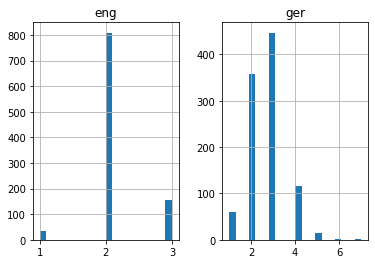

In [11]:
############ plot the length of all the phrases
import matplotlib.pyplot as plt 
#matplotlib inline
pd.set_option('display.max_colwidth', 200)

length_df = pd.DataFrame({'eng':eng_l, 'ger':ger_l})
length_df.hist(bins = 20)
plt.show()

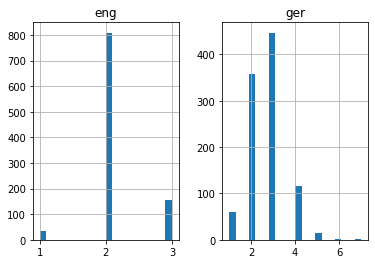

In [12]:
############ plot the length of all the phrases
import matplotlib.pyplot as plt 
#matplotlib inline
pd.set_option('display.max_colwidth', 200)

length_df = pd.DataFrame({'eng':eng_l, 'ger':ger_l})
length_df.hist(bins = 20)
plt.show()

In [13]:
########### Get the longest length
max_length_ger = max(length_df['ger'])
max_length_eng = max(length_df['eng'])
print(max_length_ger)
print(max_length_eng)

7
3


#  Tokenizer 

In [15]:
#Tokenizer to make each phrase has key_vakue(sequence) format
from nltk import word_tokenize
from tensorflow.python.keras.preprocessing.text import Tokenizer
########### Word Tokenizer to word_index ###############
def tokenizer_word_index(txt):
    tokenizer_ = Tokenizer()
    s = tokenizer_.fit_on_texts(txt)  ############ None type, output none #################
    return tokenizer_.word_index  ########### We should make tokenizer at first
Eng_windex_tokenizer = tokenizer_word_index(Eng_Ger_trans_ar[:,0])   ###### Make sequence to each word ##
Ger_windex_tokenizer = tokenizer_word_index(Eng_Ger_trans_ar[:,1])
eng_corpus_size = len(Eng_windex_tokenizer) + 1
ger_corpus_size = len(Ger_windex_tokenizer) + 1

print('English Corpus Size: %d' % eng_corpus_size)
print('Germany Corpus Size: %d' % ger_corpus_size)

English Corpus Size: 383
Germany Corpus Size: 704


In [16]:
Ger_windex_tokenizer
#Eng_Ger_trans_ar[:,1]

{'ich': 1,
 'es': 2,
 'tom': 3,
 'sie': 4,
 'bin': 5,
 'ist': 6,
 'dich': 7,
 'habe': 8,
 'auf': 9,
 'mir': 10,
 'das': 11,
 'mach': 12,
 'wir': 13,
 'uns': 14,
 'zu': 15,
 'geht': 16,
 'nicht': 17,
 'wer': 18,
 'er': 19,
 'gehen': 20,
 'ab': 21,
 'an': 22,
 'gut': 23,
 'weg': 24,
 'mich': 25,
 'werde': 26,
 'geh': 27,
 'hat': 28,
 'du': 29,
 'hier': 30,
 'komm': 31,
 'ihn': 32,
 'mal': 33,
 'lass': 34,
 'in': 35,
 'verloren': 36,
 'haben': 37,
 'fort': 38,
 'scher': 39,
 'kann': 40,
 'bleib': 41,
 'nimm': 42,
 'setz': 43,
 'gewonnen': 44,
 'zieh': 45,
 'die': 46,
 'jetzt': 47,
 'dir': 48,
 'bleiben': 49,
 'sei': 50,
 'sich': 51,
 'versucht': 52,
 'meine': 53,
 'versuchen': 54,
 'hör': 55,
 'wie': 56,
 'gesehen': 57,
 'fiel': 58,
 'gehts': 59,
 'ernst': 60,
 'frag': 61,
 'hau': 62,
 'verschwinde': 63,
 'verdufte': 64,
 'leine': 65,
 'vom': 66,
 'acker': 67,
 'verzieh': 68,
 'verkrümele': 69,
 'troll': 70,
 'zisch': 71,
 'pack': 72,
 '’ne': 73,
 'fliege': 74,
 'schwirr': 75,
 'sause': 7

## Sequence 

## Padding 

In [17]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
def pad(x, max_length):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    return pad_sequences(x,max_length , padding='post')


# Tokenization

In [18]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [19]:
# prepare english tokenizer
eng_tokenizer = tokenization(Eng_Ger_trans_ar[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
#eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 383


In [20]:
#eng_tokenizer.word_index

In [23]:
# prepare english tokenizer
ger_tokenizer = tokenization(Eng_Ger_trans_ar[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1

#eng_length = 8
print('Germany Vocabulary Size: %d' % ger_vocab_size)

Germany Vocabulary Size: 704


In [24]:
# encode and pad sequences
#from tensorflow.python.keras.preprocessing.sequence import pad_sequences
#def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    #seq = tokenizer.texts_to_sequences(lines)
    
    # pad sequences with 0 values
    #seqq = pad(seq, length)
    #return seq
def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    #seq = pad_sequences(seq, maxlen=length, padding='post')
    seq = pad(seq, length)
    return seq

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Eng_Ger_trans_ar, test_size=0.2, random_state = 2019)

In [26]:
 #train_test_split?

In [27]:
# prepare training data
trainX = encode_sequences(ger_tokenizer, max_length_ger, train[:, 1])
trainY = encode_sequences(eng_tokenizer, max_length_eng, train[:, 0])
# prepare validation data
testX = encode_sequences(ger_tokenizer, max_length_ger, test[:, 1])
testY = encode_sequences(eng_tokenizer, max_length_eng, test[:, 0])

# With attention

In [28]:
trainX 

array([[  1,   5, 114, ...,   0,   0,   0],
       [  2, 145,  10, ...,   0,   0,   0],
       [  8,   1, 119, ...,   0,   0,   0],
       ...,
       [352,   3,   0, ...,   0,   0,   0],
       [  1,   5, 418, ...,   0,   0,   0],
       [ 27,  24,   0, ...,   0,   0,   0]], dtype=int32)

In [29]:
Eng_Ger_trans_ar

array([['hi', 'hallo'],
       ['hi', 'grüß gott'],
       ['run', 'lauf'],
       ...,
       ['can i come', 'kann ich kommen'],
       ['can i come', 'darf ich kommen'],
       ['can i help', 'kann ich helfen']], dtype=object)

In [30]:
#import tensorflow 
#import tensorflow.compat.v2.keras.layers.Attention
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, LSTM, Dense, GRU,RepeatVector, TimeDistributed, Dropout
from nltk import FreqDist
import tensorflow as tf
from tensorflow.python.keras.layers import Attention
#model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))

def build_model_attention(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
   # model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
######################## Attention Layer ######################
    model.add(Attention(in_vocab))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

#from keras import optimizers

model_attention = build_model_attention(trainX.all(), eng_vocab_size, max_length_ger, max_length_eng, 32)
#rms = optimizers.RMSprop(lr=0.001)
#model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
model_attention.compile(loss='sparse_categorical_crossentropy',optimizer='adam',lr = 1e-3,metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

TypeError: Invalid keyword argument(s) in `compile`: {'lr'}

In [31]:
## trainX.shape (800, 7) trainY.shape (800, 3) 
from tensorflow.python.keras.callbacks import ModelCheckpoint
filename = 'model.h1.1119'
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#history_attention = model_attention.fit(trainX.all(), trainY.reshape(trainY.shape[0], trainY.shape[1], 1), 
history_attention = model_attention.fit(trainX.all(), Eng_windex_tokenizer, 
          epochs=20, batch_size=32, #####################If more epochs here, the result would be better !!!
          validation_split = 0.2,
           verbose=1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Build model 

In [32]:
# build NMT model
def build_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    ############## Encoder ##########################
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    ############## Decoder #########################
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [56]:

#from keras import optimizers

model = build_model(ger_vocab_size, eng_vocab_size, max_length_ger, max_length_eng, 32)
#rms = optimizers.RMSprop(lr=0.001)
#model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# Every 200 iterations

In [57]:
## trainX.shape (800, 7) trainY.shape (800, 3) 
from tensorflow.python.keras.callbacks import ModelCheckpoint
filename = 'model.h1.1120'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
'''
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), 
          epochs=200, batch_size=32, #####################If more epochs here, the result would be better !!!
          validation_split = 0.2,
          callbacks=[checkpoint], verbose=1)'''
steps = int(trainX.shape[0]*0.8)
losses = []
for iteration in range(steps):
    #feed = feed_dict(X_train, Y_train)
            
    #backward_step(sess, feed)
        
    if iteration % 200 == 0 or iteration == 0:
        
        history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), 
          epochs=1, batch_size=32, #####################If more epochs here, the result would be better !!!
          validation_split = 0.2,
          callbacks=[checkpoint], verbose=1)
        loss_value = history.history['loss']
        print ('step: {}, loss: {}'.format(iteration, loss_value))
        losses.append(loss_value)
        

19/20 [===========================>..] - ETA: 0s - loss: 5.9342 - accuracy: 0.2566  
Epoch 00001: val_loss improved from inf to 5.91083, saving model to model.h1.1120
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.h1.1120/assets
20/20 [==============================] - 4s 219ms/step - loss: 5.9332 - accuracy: 0.2589 - val_loss: 5.9108 - val_accuracy: 0.2937
step: 0, loss: [5.933244228363037]
20/20 [==============================] - ETA: 0s - loss: 5.8596 - accuracy: 0.2927
Epoch 00001: val_loss improved from 5.91083 to 5.76114, saving model to model.h1.1120
INFO:tensorflow:Assets written to: model.h1.1120/assets
20/20 [==============================] - 4s 203ms/step - loss: 5.8596 - accuracy: 0.2927 - val_loss: 5.7611 - val_accuracy: 0.2937
step: 200, loss: [5.8

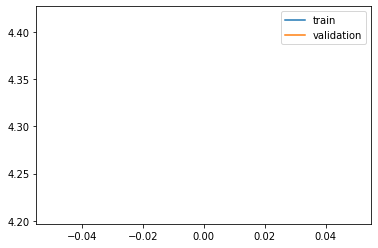

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

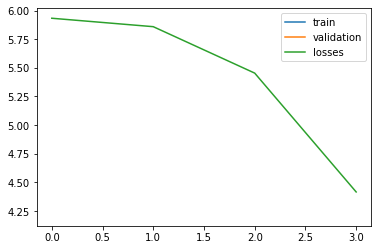

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(losses)
plt.legend(['train','validation', 'losses'])
plt.show()

In [60]:
trainX.shape
#type(trainY.shape)
aa = trainY.reshape(trainY.shape[0], trainY.shape[1], 1)
aa.shape

(800, 3, 1)

In [61]:
####testY.shapm     (200,3)

# Another epoch measure(normal)

In [62]:
## trainX.shape (800, 7) trainY.shape (800, 3) 
from tensorflow.python.keras.callbacks import ModelCheckpoint
filename = 'model.h1.1121'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), 
          epochs=200, batch_size=32, #####################If more epochs here, the result would be better !!!
          validation_split = 0.2,
          callbacks=[checkpoint], verbose=1)

Epoch 1/200
20/20 [==============================] - ETA: 0s - loss: 4.0820 - accuracy: 0.2927
Epoch 00001: val_loss improved from inf to 4.18176, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 219ms/step - loss: 4.0820 - accuracy: 0.2927 - val_loss: 4.1818 - val_accuracy: 0.2937
Epoch 2/200
20/20 [==============================] - ETA: 0s - loss: 4.0321 - accuracy: 0.2927
Epoch 00002: val_loss did not improve from 4.18176
20/20 [==============================] - 0s 6ms/step - loss: 4.0321 - accuracy: 0.2927 - val_loss: 4.1830 - val_accuracy: 0.2937
Epoch 3/200
11/20 [===============>..............] - ETA: 0s - loss: 4.0296 - accuracy: 0.2850
Epoch 00003: val_loss did not improve from 4.18176
20/20 [==============================] - 0s 6ms/step - loss: 4.0005 - accuracy: 0.2927 - val_loss: 4.1852 - val_accuracy: 0.2937
Epoch 4/200
20/20 [==============================] - ETA: 0s - loss: 3.9746 - accuracy

Epoch 25/200
12/20 [=================>............] - ETA: 0s - loss: 3.5204 - accuracy: 0.3342
Epoch 00025: val_loss improved from 3.95265 to 3.94434, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 211ms/step - loss: 3.5075 - accuracy: 0.3365 - val_loss: 3.9443 - val_accuracy: 0.3458
Epoch 26/200
11/20 [===============>..............] - ETA: 0s - loss: 3.4895 - accuracy: 0.3390
Epoch 00026: val_loss did not improve from 3.94434
20/20 [==============================] - 0s 6ms/step - loss: 3.4953 - accuracy: 0.3359 - val_loss: 3.9460 - val_accuracy: 0.3458
Epoch 27/200
12/20 [=================>............] - ETA: 0s - loss: 3.4255 - accuracy: 0.3455
Epoch 00027: val_loss improved from 3.94434 to 3.94026, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 181ms/step - loss: 3.4825 - accuracy: 0.3365 - val_loss: 3.9403 - val_acc

Epoch 49/200
11/20 [===============>..............] - ETA: 0s - loss: 3.1299 - accuracy: 0.3665
Epoch 00049: val_loss improved from 3.83492 to 3.82683, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 182ms/step - loss: 3.1766 - accuracy: 0.3609 - val_loss: 3.8268 - val_accuracy: 0.3646
Epoch 50/200
11/20 [===============>..............] - ETA: 0s - loss: 3.1413 - accuracy: 0.3703
Epoch 00050: val_loss improved from 3.82683 to 3.81752, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 210ms/step - loss: 3.1539 - accuracy: 0.3672 - val_loss: 3.8175 - val_accuracy: 0.3646
Epoch 51/200
12/20 [=================>............] - ETA: 0s - loss: 3.1550 - accuracy: 0.3715
Epoch 00051: val_loss improved from 3.81752 to 3.79820, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [=================

20/20 [==============================] - ETA: 0s - loss: 2.6810 - accuracy: 0.4323
Epoch 00072: val_loss improved from 3.66292 to 3.66177, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 215ms/step - loss: 2.6810 - accuracy: 0.4323 - val_loss: 3.6618 - val_accuracy: 0.4042
Epoch 73/200
11/20 [===============>..............] - ETA: 0s - loss: 2.6562 - accuracy: 0.4498
Epoch 00073: val_loss improved from 3.66177 to 3.65248, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 182ms/step - loss: 2.6650 - accuracy: 0.4365 - val_loss: 3.6525 - val_accuracy: 0.3917
Epoch 74/200
11/20 [===============>..............] - ETA: 0s - loss: 2.6845 - accuracy: 0.4328
Epoch 00074: val_loss improved from 3.65248 to 3.64186, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================

11/20 [===============>..............] - ETA: 0s - loss: 2.3301 - accuracy: 0.4773
Epoch 00095: val_loss did not improve from 3.53509
20/20 [==============================] - 0s 6ms/step - loss: 2.3425 - accuracy: 0.4839 - val_loss: 3.5403 - val_accuracy: 0.4313
Epoch 96/200
12/20 [=================>............] - ETA: 0s - loss: 2.2954 - accuracy: 0.4852
Epoch 00096: val_loss improved from 3.53509 to 3.52586, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 182ms/step - loss: 2.3275 - accuracy: 0.4823 - val_loss: 3.5259 - val_accuracy: 0.4271
Epoch 97/200
12/20 [=================>............] - ETA: 0s - loss: 2.3564 - accuracy: 0.4714
Epoch 00097: val_loss improved from 3.52586 to 3.52183, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 204ms/step - loss: 2.3157 - accuracy: 0.4828 - val_loss: 3.5218 - val_accuracy: 0.4333

INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 181ms/step - loss: 2.0193 - accuracy: 0.5495 - val_loss: 3.4530 - val_accuracy: 0.4292
Epoch 121/200
12/20 [=================>............] - ETA: 0s - loss: 1.9970 - accuracy: 0.5417
Epoch 00121: val_loss did not improve from 3.45300
20/20 [==============================] - 0s 6ms/step - loss: 2.0082 - accuracy: 0.5495 - val_loss: 3.4550 - val_accuracy: 0.4292
Epoch 122/200
12/20 [=================>............] - ETA: 0s - loss: 2.0187 - accuracy: 0.5434
Epoch 00122: val_loss did not improve from 3.45300
20/20 [==============================] - 0s 6ms/step - loss: 1.9949 - accuracy: 0.5557 - val_loss: 3.4573 - val_accuracy: 0.4313
Epoch 123/200
12/20 [=================>............] - ETA: 0s - loss: 2.0189 - accuracy: 0.5425
Epoch 00123: val_loss did not improve from 3.45300
20/20 [==============================] - 0s 6ms/step - loss: 1.9815 - accuracy: 0.5573 - val_loss: 3.4600 - val

Epoch 149/200
11/20 [===============>..............] - ETA: 0s - loss: 1.7323 - accuracy: 0.6032
Epoch 00149: val_loss did not improve from 3.42007
20/20 [==============================] - 0s 6ms/step - loss: 1.6910 - accuracy: 0.6099 - val_loss: 3.4222 - val_accuracy: 0.4583
Epoch 150/200
12/20 [=================>............] - ETA: 0s - loss: 1.6483 - accuracy: 0.6181
Epoch 00150: val_loss did not improve from 3.42007
20/20 [==============================] - 0s 6ms/step - loss: 1.6782 - accuracy: 0.6073 - val_loss: 3.4256 - val_accuracy: 0.4542
Epoch 151/200
12/20 [=================>............] - ETA: 0s - loss: 1.6609 - accuracy: 0.6076
Epoch 00151: val_loss improved from 3.42007 to 3.41484, saving model to model.h1.1121
INFO:tensorflow:Assets written to: model.h1.1121/assets
20/20 [==============================] - 4s 181ms/step - loss: 1.6668 - accuracy: 0.6130 - val_loss: 3.4148 - val_accuracy: 0.4563
Epoch 152/200
11/20 [===============>..............] - ETA: 0s - loss: 1.616

Epoch 178/200
12/20 [=================>............] - ETA: 0s - loss: 1.3754 - accuracy: 0.6684
Epoch 00178: val_loss did not improve from 3.41028
20/20 [==============================] - 0s 6ms/step - loss: 1.4046 - accuracy: 0.6641 - val_loss: 3.4179 - val_accuracy: 0.4604
Epoch 179/200
12/20 [=================>............] - ETA: 0s - loss: 1.3936 - accuracy: 0.6753
Epoch 00179: val_loss did not improve from 3.41028
20/20 [==============================] - 0s 6ms/step - loss: 1.3949 - accuracy: 0.6651 - val_loss: 3.4240 - val_accuracy: 0.4604
Epoch 180/200
12/20 [=================>............] - ETA: 0s - loss: 1.3838 - accuracy: 0.6684
Epoch 00180: val_loss did not improve from 3.41028
20/20 [==============================] - 0s 6ms/step - loss: 1.3853 - accuracy: 0.6693 - val_loss: 3.4165 - val_accuracy: 0.4583
Epoch 181/200
12/20 [=================>............] - ETA: 0s - loss: 1.3849 - accuracy: 0.6780
Epoch 00181: val_loss did not improve from 3.41028
20/20 [==============

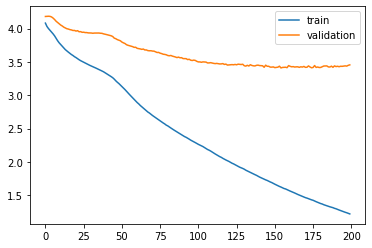

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

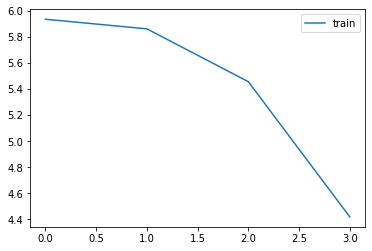

In [64]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.plot(losses)
plt.legend(['train','validation', 'losses'])
plt.show()

## Make predictions 

In [42]:
from tensorflow.python.keras.models import load_model
#model = load_model('model.h1.24_jan_19')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
preds ############# Preds is the vectors about the translation word #############

array([[313, 333, 333],
       [  0,   0,   0],
       [333, 333, 333],
       [183, 183, 183],
       [203, 203, 355],
       [200, 200, 200],
       [316, 316, 316],
       [  5,   5,   5],
       [314, 314, 314],
       [261, 233, 260],
       [101, 101, 101],
       [151, 355, 355],
       [291, 291,  98],
       [211, 211, 211],
       [263, 263, 340],
       [261, 261, 261],
       [169, 169, 169],
       [232, 232, 232],
       [  2,   2,   2],
       [  0,  40,  40],
       [138, 138, 138],
       [191, 191, 191],
       [ 11,  11,  11],
       [  2,   2,   2],
       [183, 183, 183],
       [254, 254, 254],
       [ 68,  68,  68],
       [254, 254, 254],
       [314, 314, 314],
       [377, 377, 377],
       [355, 355, 355],
       [137, 137, 137],
       [321, 321, 321],
       [ 97,  97,  97],
       [ 97,  97,  97],
       [332, 332, 332],
       [138, 138, 138],
       [117, 117, 117],
       [ 29, 247, 247],
       [ 27,  27,  27],
       [193, 193, 193],
       [  7,   7

In [44]:

def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n: 
    ###############Using Key-Value to search in tokenizer.word_index dictionary
            return word
    return None

In [45]:
#eng_tokenizer.word_index.items()

In [46]:
# convert predictions into text (English)
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None): 
                ############# The same meaning words or can not translate to English words
                temp.append('')
            else:
                temp.append(t)
             
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 
                ############# This English word can not be translated to Germany word ###########           
        
    preds_text.append(' '.join(temp))

Normal epoches do better in translation

In [47]:
preds_text

['one far ',
 '  ',
 'far  ',
 'bald  ',
 'inside  then',
 'do  ',
 'live  ',
 'go  ',
 'woke  ',
 'wet burned snore',
 'new  ',
 'mad then ',
 'touch  fair',
 'hope  ',
 'pull  open',
 'wet  ',
 'old  ',
 'ignore  ',
 'tom  ',
 ' watch ',
 'brief  ',
 'hurts  ',
 'lost  ',
 'tom  ',
 'bald  ',
 'sang  ',
 'fun  ',
 'sang  ',
 'woke  ',
 '18  ',
 'then  ',
 'brave  ',
 'awake  ',
 'lied  ',
 'lied  ',
 'ive  ',
 'brief  ',
 'win  ',
 'is wonderful ',
 'this  ',
 'left  ',
 'get  ',
 'tv  ',
 'tight  ',
 'win  ',
 'is  ',
 'loosen  ',
 'awake  ',
 'wept  ',
 'im  ',
 'pull  ',
 'dozed  ',
 'hes  ',
 'left  ',
 'tom  ask',
 '  ',
 'free  tight',
 'pull  ',
 'unlock  ',
 'use  ',
 'give  ',
 'ive  ',
 'helps  ',
 'want  ',
 'win  ',
 'lazy  ',
 'use  ',
 'sign answer ',
 'rich  ',
 'left tight ',
 'help  ',
 'cute  ',
 'bless  ',
 'new im ',
 'freeze  ',
 'is wonderful ',
 'stayed  ',
 'terrific  ',
 'old  ',
 'show  ',
 'deaf  dozed',
 'fun  ',
 'im want ',
 'awake  ',
 'paid  real',
 'w

In [48]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

In [49]:
#pd.set_option('display.max_colwidth', 200)

In [50]:
pred_df

,actual,predicted
0,im rich,one far
1,ignore it,
2,keep warm,far
3,im bored,bald
4,who quit,inside then
...,...,...
195,stay cool,then forget
196,watch us,awesome
197,who quit,home
198,go away,us


In [51]:
actual_df_list = list(pred_df['actual'])
pred_df_list = list(pred_df['predicted'])
#pred_df_list

#  BLEU

In [52]:
from nltk.translate.bleu_score import sentence_bleu
#reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
#candidate = ['this', 'is', 'a', 'baby']
for i in range(0,200):
    reference = actual_df_list[i]
    candidate = pred_df_list[i]
    score = sentence_bleu(reference, candidate)
    print(score)


1.2882297539194154e-231
1.5319719891192393e-231
1.6034157163765524e-231
1.5319719891192393e-231
1.384292958842266e-231
1.6954057018456463e-231
1.384292958842266e-231
1.5319719891192393e-231
1.646211035903463e-231
1.1988328686372911e-231
1.2183324802375697e-231
1.2508498911928379e-231
1.4147351699132998e-231
1.384292958842266e-231
1.4488496539373276e-231
1.4488496539373276e-231
1.2183324802375697e-231
1.0832677820940877e-231
1.4488496539373276e-231
1.331960397810445e-231
1.4740564900137075e-231
1.4740564900137075e-231
1.5319719891192393e-231
1.6034157163765524e-231
1.1640469867513693e-231
1.5319719891192393e-231
1.2183324802375697e-231
1.5319719891192393e-231
1.384292958842266e-231
1.2882297539194154e-231
1.384292958842266e-231
1.331960397810445e-231
1.4740564900137075e-231
1.384292958842266e-231
1.1640469867513693e-231
1.4488496539373276e-231
1.583976781977924e-231
1.4488496539373276e-231
1.4347128449946335e-231
1.384292958842266e-231
1.384292958842266e-231
1.2183324802375697e-231
1.28

/Users/albertliang/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/albertliang/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/albertliang/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using 

In [74]:
#score

# END